<a href="https://colab.research.google.com/github/RonaldoORM/GS2_IA_3ECA_2024./blob/main/GS2_IA_3ECA_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
# Carregar o dataset
file_path = "/content/station_data_dataverse.csv"  # Atualize o caminho conforme necessário
df = pd.read_csv(file_path)

In [65]:
# Explorando o dataset
print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações gerais sobre o dataset:")
print(df.info())
print("\nEstatísticas descritivas do dataset:")
print(df.describe())

Primeiras linhas do dataset:
   sessionId  kwhTotal  dollars              created                ended  \
0    1366563      7.78     0.00  0014-11-18 15:40:26  0014-11-18 17:11:04   
1    3075723      9.74     0.00  0014-11-19 17:40:26  0014-11-19 19:51:04   
2    4228788      6.76     0.58  0014-11-21 12:05:46  0014-11-21 16:46:04   
3    3173284      6.17     0.00  0014-12-03 19:16:12  0014-12-03 21:02:18   
4    3266500      0.93     0.00  0014-12-11 20:56:11  0014-12-11 21:14:06   

   startTime  endTime  chargeTimeHrs weekday platform  ...  managerVehicle  \
0         15       17       1.510556     Tue  android  ...               0   
1         17       19       2.177222     Wed  android  ...               0   
2         12       16       4.671667     Fri  android  ...               0   
3         19       21       1.768333     Wed  android  ...               0   
4         20       21       0.298611     Thu  android  ...               0   

   facilityType  Mon  Tues  Wed  Thurs 

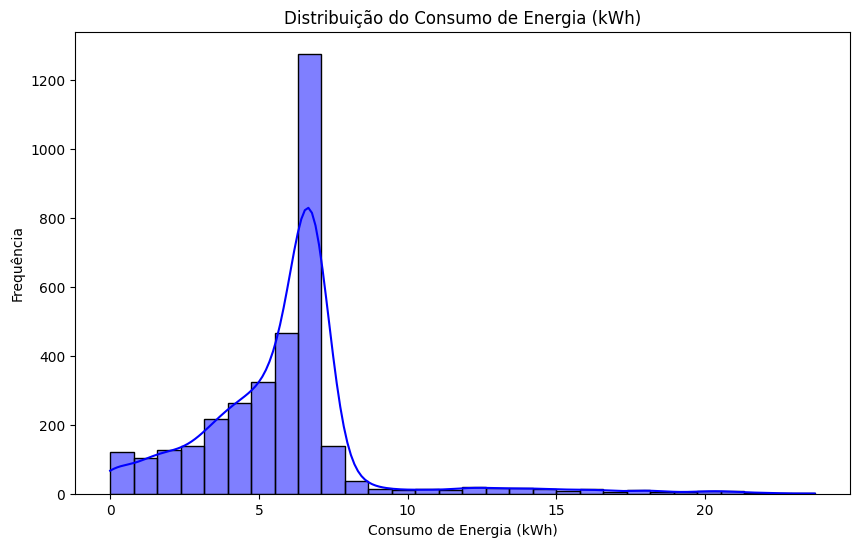

In [66]:
# Visualizando dados importantes (Exemplo: Distribuição da energia consumida)
plt.figure(figsize=(10, 6))
sns.histplot(df['kwhTotal'], bins=30, kde=True, color='blue')
plt.title("Distribuição do Consumo de Energia (kWh)")
plt.xlabel("Consumo de Energia (kWh)")
plt.ylabel("Frequência")
plt.show()

In [67]:
# Preprocessamento de dados
print("\nVerificando valores ausentes por coluna:")
print(df.isnull().sum())


Verificando valores ausentes por coluna:
sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
dtype: int64


Erro Médio Quadrático (MSE): 3.61
Erro Médio Absoluto (MAE): 1.90


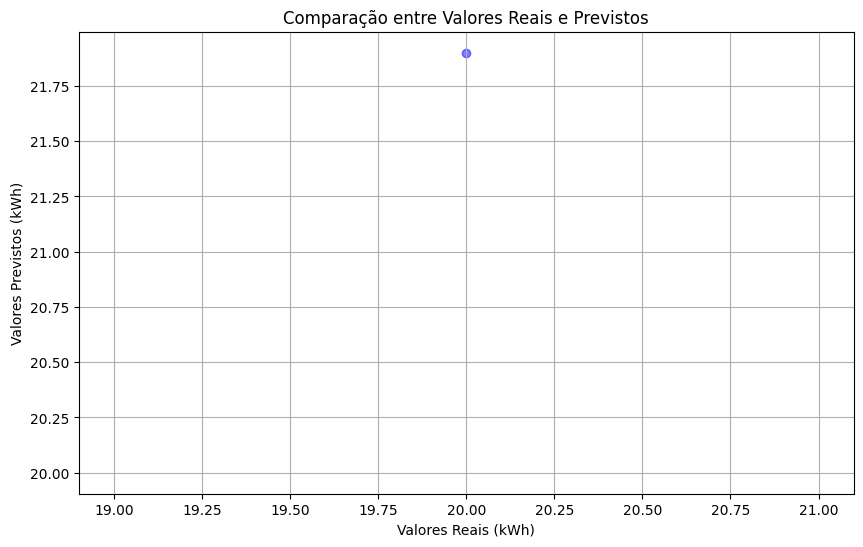

In [68]:
# Realizando previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)  # Erro Médio Quadrático
mae = mean_absolute_error(y_test, y_pred)  # Erro Médio Absoluto

# Exibindo os resultados
print(f"Erro Médio Quadrático (MSE): {mse:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")

# Traçando a comparação entre os valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Valores Reais (kWh)")
plt.ylabel("Valores Previstos (kWh)")
plt.grid(True)
plt.show()

In [69]:
# Preenchendo valores ausentes com a mediana apenas para colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [70]:
# Selecionando recursos (features) e alvo (target)
X = df[['stationId', 'chargeTimeHrs', 'weekday', 'facilityType']]
y = df['kwhTotal']

In [71]:
# Convertendo dados categóricos, se necessário (Exemplo: weekday e facilityType)
X = pd.get_dummies(X, columns=['weekday', 'facilityType'], drop_first=True)

In [72]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Criando e treinando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
# Avaliando o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [75]:
print(f"\nErro Médio Quadrático (MSE): {mse}")
print(f"Erro Médio Absoluto (MAE): {mae}")


Erro Médio Quadrático (MSE): 5.260343722375995
Erro Médio Absoluto (MAE): 1.3979820176730486


In [76]:
# Visualizando a importância das features
importances = model.feature_importances_
features = X.columns

<ipython-input-77-a337bb5deacf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis", hue=None, legend=False)


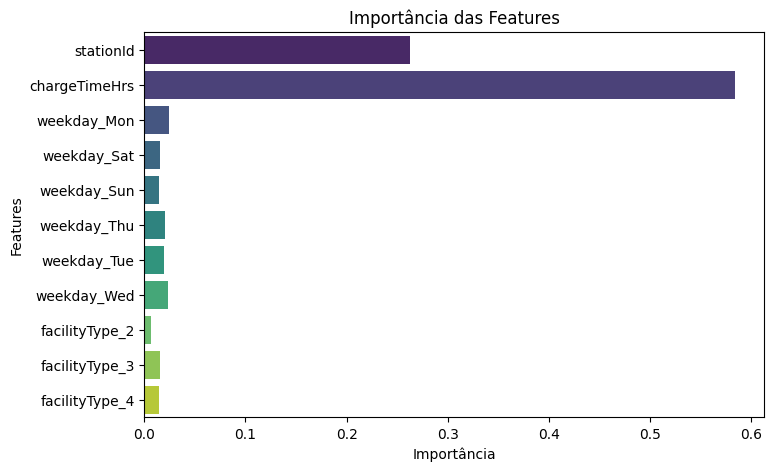

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="viridis", hue=None, legend=False)
plt.title("Importância das Features")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()

In [78]:
# Previsão em novos dados (Exemplo)
new_data = pd.DataFrame({
    'stationId': [101, 102],
    'chargeTimeHrs': [2.5, 4.0],
    'weekday_Monday': [1, 0],
    'weekday_Tuesday': [0, 1],
    'facilityType_Home': [0, 1]
})

In [79]:
# Supondo que 'X' seja o DataFrame usado para o treinamento

# Obter os nomes das features usadas durante o treinamento
training_features = X.columns.tolist()

# Garantir que new_data tenha todas as colunas em training_features,
# criando colunas ausentes e preenchendo com 0
for feature in training_features:
    if feature not in new_data.columns:
        new_data[feature] = 0  # Preencher colunas ausentes com 0

# Reordenar as colunas de new_data para corresponder à ordem em training_features
new_data = new_data[training_features]

# Agora você pode fazer previsões
predictions = model.predict(new_data)
print("\nPrevisões para novos dados:")
print(predictions)


Previsões para novos dados:
[6.0511 5.2355]


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Dados de exemplo (substituir por seu dataset real)
X = pd.DataFrame({'feature1': [1, 2, 3, 4, 5], 'feature2': [5, 4, 3, 2, 1]})
y = pd.Series([10, 20, 30, 40, 50])

# Divisão dos dados com maior conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Treinamento do modelo
model.fit(X_train, y_train)

# Avaliação do modelo
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Resultados
print("Resultados das Métricas de Avaliação:")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAPE (Erro Médio Absoluto Percentual): {mape:.2f}%")

Resultados das Métricas de Avaliação:
R² (Coeficiente de Determinação): 0.3540
MAPE (Erro Médio Absoluto Percentual): 18.88%
